In [1]:
import sys
import tqdm
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
import gpytorch
import matplotlib.pyplot as plt

sys.path.append("../")
from estimator import SSGE

In [2]:
kernel = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.MaternKernel(
        ard_num_dims = 10
    )
)

In [3]:
estimator = SSGE(
    gpytorch.kernels.ScaleKernel(
        gpytorch.kernels.MaternKernel(
            ard_num_dims = 10
        )
    )
)

In [4]:
dist = torch.distributions.multivariate_normal.MultivariateNormal(
    torch.zeros(10),
    torch.eye(10),
)

In [5]:
sample = dist.sample([100])
sample.requires_grad_(True)
estimator.fit(sample)

In [6]:
test_sample = dist.sample([100])
test_sample.requires_grad_(True)
estimator.grad(test_sample).shape

torch.Size([100, 10])

<h4>Error shrinks as the fitted sample size increases. </h4>

In [7]:
res = []
for num_sample in tqdm.tqdm(range(1, 50)):
    kernel = gpytorch.kernels.ScaleKernel(
        gpytorch.kernels.MaternKernel(
            ard_num_dims = 10
        )
    )
    
    estimator = SSGE(
        gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.MaternKernel(
                ard_num_dims = 10
            )
        )
    )
    
    sample = dist.sample([num_sample * 10])
    sample.requires_grad_(True)
    estimator.fit(sample)

    test_sample = dist.sample([1000])
    test_sample.requires_grad_(True)
    grad_hat = estimator.grad(test_sample)
    dist.log_prob(test_sample).sum().backward()
    res.append(torch.dist(grad_hat, test_sample.grad) / num_sample)

100%|██████████████████████████████████████████████████████████████████████| 49/49 [00:41<00:00,  1.17it/s]


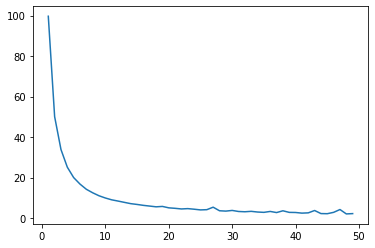

In [8]:
plt.plot(range(1,50), res)

<h4>Error shrinks as the test sample size increases. </h4>

In [9]:
res = []
for num_sample in tqdm.tqdm(range(1, 500)):
    test_sample = dist.sample([num_sample * 10])
    test_sample.requires_grad_(True)
    grad_hat = estimator.grad(test_sample)
    dist.log_prob(test_sample).sum().backward()
    res.append(torch.dist(grad_hat, test_sample.grad) / num_sample)

100%|████████████████████████████████████████████████████████████████████| 499/499 [01:10<00:00,  7.11it/s]


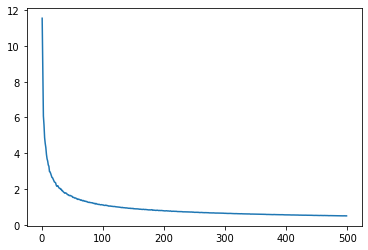

In [10]:
plt.plot(range(1,500), res)